In [9]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


matplotlib.style.use('ggplot') # Look Pretty
c = ['red', 'green', 'blue', 'orange', 'yellow', 'brown']

In [2]:
df=pd.read_csv('../DAT210x/Module5/Datasets/Wholesale customers data.csv')

In [5]:
df.fillna(0, inplace=True)

In [13]:
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [14]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [6]:
PLOT_TYPE_TEXT = False    # If you'd like to see indices
PLOT_VECTORS = True       # If you'd like to see your original features in P.C.-Space

In [7]:
def drawVectors(transformed_features, components_, columns, plt):
    num_columns = len(columns)

    # This function will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## Visualize projections

    # Sort each column by its length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Projected Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75, zorder=600000)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75, zorder=600000)
        
    return ax

In [8]:
def doPCA(data, dimensions=2):
    model = PCA(n_components=dimensions, svd_solver='randomized', random_state=7)
    model.fit(data)
    return model

In [52]:
def doKMeans(data, num_clusters=0): 
    model=KMeans(n_clusters)
    model.fit(df)
#     centroids=model.cluster_centers_    
    return model.cluster_centers_, model.labels_

In [29]:
# for col in df.columns:
#     df[col].plot.hist(density=False)
#     plt.show()

In [49]:
top_custos=[]
bottom_custos=[]
for col in df.columns:
    top5=df.sort_values(col, axis=0, ascending=False)
    top5=top5[col].iloc[0:5]
    y=list(top5.index)
    top_custos+=y
    
    bottom5=df.sort_values(col, axis=0)
    bottom5=bottom5[col].iloc[0:5]
    x=list(bottom5.index)
    bottom_custos+=x

bottom_set=set(bottom_custos) 
top_set=set(top_custos)

full_set=top_set | bottom_set

df.drop(index=top_set, inplace=True)

In [84]:
# T = preprocessing.StandardScaler().fit_transform(df)
#T = preprocessing.MinMaxScaler().fit_transform(df)
#T = preprocessing.MaxAbsScaler().fit_transform(df)
#T = preprocessing.Normalizer().fit_transform(df)
T = df # No Change

In [85]:
n_clusters = 3
centroids, labels = doKMeans(T, n_clusters)
print(centroids)

[[4.81550617e+03 1.20405802e+04 1.87237160e+04 1.58595062e+03
  8.33433333e+03 1.65385185e+03 1.98765432e+00]
 [2.53417900e+04 4.00985000e+03 5.17100000e+03 3.76385000e+03
  1.12555000e+03 1.56619000e+03 6.66133815e-16]
 [6.67792500e+03 3.23309583e+03 4.04136667e+03 2.45499167e+03
  1.18660833e+03 1.00130833e+03 1.00000000e+00]]


In [86]:
display_pca = doPCA(T)
T = display_pca.transform(T)
CC = display_pca.transform(centroids)

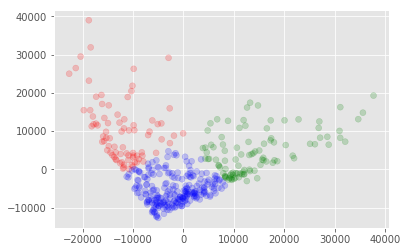

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
    # Plot the index of the sample, so you can further investigate it in your dset
    for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
    ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
    ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
    # Plot a regular scatter plot
    sample_colors = [ c[labels[i]] for i in range(len(T)) ]
    ax.scatter(T[:, 0], T[:, 1], c=sample_colors, marker='o', alpha=0.2)

In [62]:
ax.scatter(CC[:, 0], CC[:, 1], marker='x', s=169, linewidths=3, zorder=1000, c=c)
for i in range(len(centroids)):
    ax.text(CC[i, 0], CC[i, 1], str(i), zorder=500010, fontsize=18, color=c[i])

In [63]:
# Display feature vectors for investigation:
if PLOT_VECTORS:
    drawVectors(T, display_pca.components_, df.columns, plt)

Projected Features by importance:
 [(37893.93341809943, 'Fresh'), (30319.352594481443, 'Grocery'), (19483.913633401837, 'Milk'), (14068.367035079955, 'Detergents_Paper'), (2866.8590206080153, 'Frozen'), (2100.1376379688268, 'Delicassen')]


ValueError: Image size of 18866689x7066577 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [64]:
# Add the cluster label back into the dataframe and display it:
df['label'] = pd.Series(labels, index=df.index)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,2


In [65]:
plt.show()